## Section 8: Palisades/ Eaton EJ map

### Load in data

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


In [2]:
eji = gpd.read_file('data/EJI_2024_California/EJI_2024_California.gdb')


##### Eaton wrangling

In [3]:
eaton_perimeter = gpd.read_file('data/Eaton_Perimeter_20250121/Eaton_Perimeter_20250121.shp')

In [4]:
eji = eji.to_crs(3857)
eji.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
eji.crs == eaton_perimeter.crs

True

####

#### Palisades Wrangling

In [6]:
palisade_perimeter = gpd.read_file('data/Palisades_Perimeter_20250121/Palisades_Perimeter_20250121.shp')
palisade_perimeter.crs == eji.crs

True

### Polygon Intersection - Nathalie

In [9]:
palisade_soc = gpd.sjoin(left_df = eji, 
                         right_df = palisade_perimeter, 
                         how = 'inner'
                         )

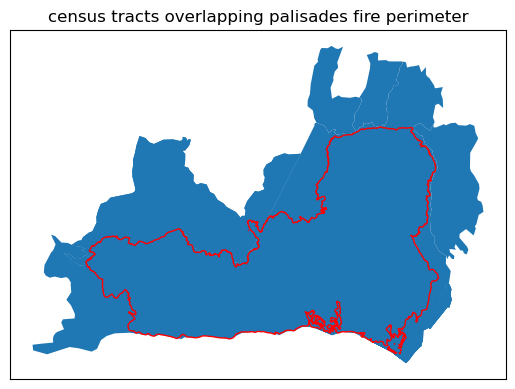

In [10]:
fig, ax = plt.subplots()
palisade_soc.plot(ax=ax)
palisade_perimeter.plot(ax=ax, edgecolor = "red")
plt.title("census tracts overlapping palisades fire perimeter")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [11]:
eaton_soc = gpd.sjoin(eji, eaton_perimeter, how = 'inner')

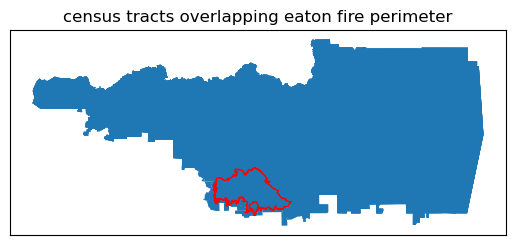

In [12]:
fig, ax = plt.subplots()
eaton_soc.plot(ax=ax)
eaton_perimeter.plot(ax=ax, edgecolor = "red")
plt.title("census tracts overlapping eaton fire perimeter")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Polygon Clipping - Vedika

In [13]:
# Clipping Palisades Fire 
eji_palisades_clip = gpd.clip(eji, palisade_perimeter)

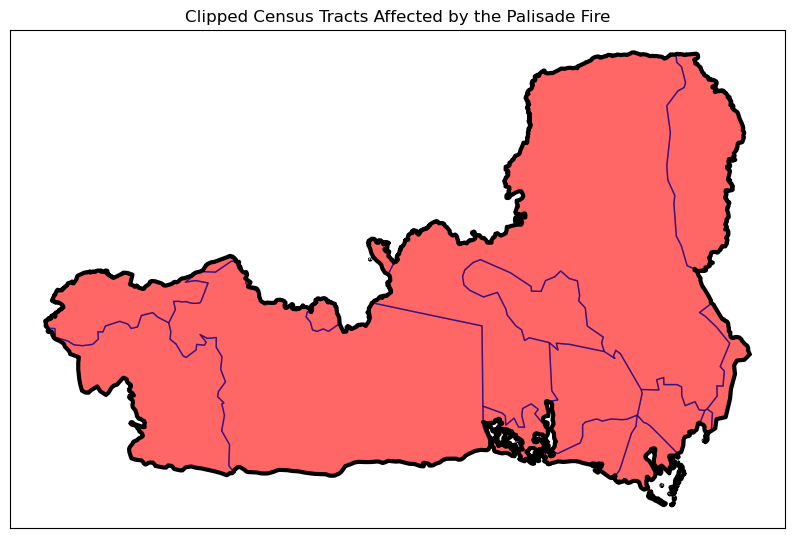

In [16]:
fig, ax = plt.subplots(figsize = (10,8))

eji_palisades_clip.plot(ax = ax, facecolor = "red", edgecolor = "darkblue", linewidth = 1, alpha = .6)

palisade_perimeter.plot(ax = ax, color = "none", edgecolor = "black", linewidth = 3)

ax.set_title("Clipped Census Tracts Affected by the Palisade Fire")

ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [17]:
eji_eaton_clip = gpd.clip(eji, eaton_perimeter)

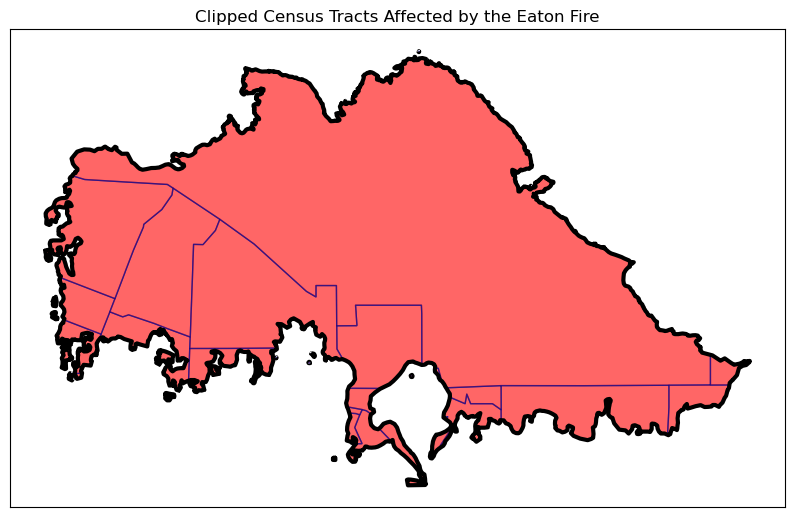

In [18]:
fig, ax = plt.subplots(figsize = (10,8))

eji_eaton_clip.plot(ax = ax, facecolor = "red", edgecolor = "darkblue", linewidth = 1, alpha = .6)

eaton_perimeter.plot(ax = ax, color = "none", edgecolor = "black", linewidth = 3)

ax.set_title("Clipped Census Tracts Affected by the Eaton Fire")

ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Create plot of both fires with basemap 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

### Visualize EJI Data 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = ''

# Find common min/max for legend range
vmin = min(census_within_palisades[eji_variable].min(), census_within_eaton[eji_variable].min())
vmax = max(census_within_palisades[eji_variable].max(), census_within_eaton[eji_variable].max())

# Plot census tracts within Palisades perimeter
census_within_palisades.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('UPDATE TITLE')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
census_within_eaton.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('UPDATE TITLE')
ax2.axis('off')

# Add overall title
fig.suptitle('YOUR VARIABLE HERE - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('YOUR VARIABLE HERE (WITH UNITS)')

plt.show()